# Comparing MTF between 0.5x and 1x lenses

In [81]:
from srayan_dof import *
from scipy.optimize import curve_fit
import pandas as pd
import cv2

In [82]:
BASE_PATH = '../../data_store/lens_compare/'
halfmag = BASE_PATH + 'half-mag-lens.tif'
onemag = BASE_PATH + 'one-mag-lens-dup.tif'
E = np.arange(25, -1, -1)

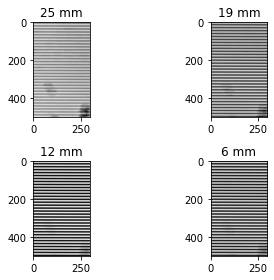

In [83]:
im = load_disp_img(halfmag, E, disp=True)

Fitted: 31.356 pixels per line


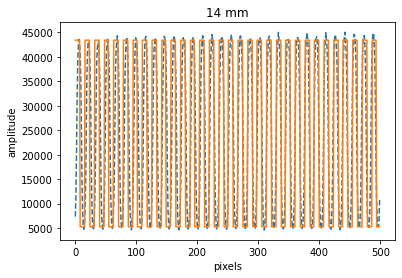

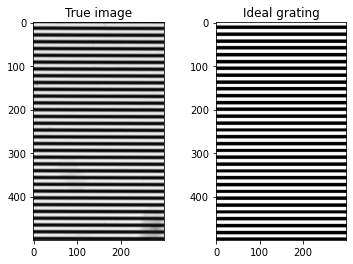

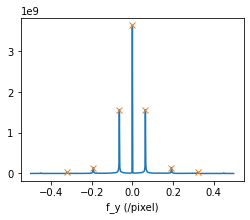

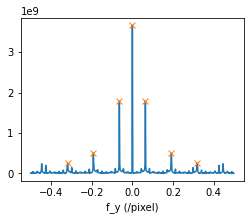

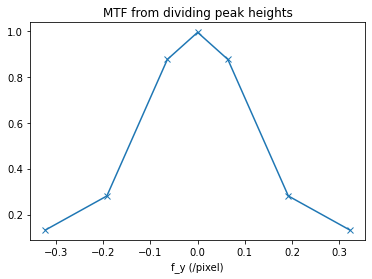

In [84]:
get_mtf_peakdivide(im, 11, E, 31.4, thresh_true=0.02e9, thresh_ideal=0.25e9)

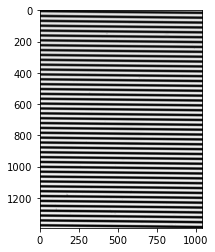

In [85]:
im = io.imread(onemag)
plt.imshow(im[0], cmap='gray')

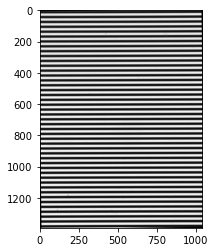

In [86]:
def apply_tilt(img, angle):
    image_center = tuple(np.array(img[0].shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)

    corrected = np.array(
        [cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR) for image in img]
    )

    return corrected

im_tilt = apply_tilt(im, 0.8)
plt.imshow(im_tilt[0], cmap='gray')

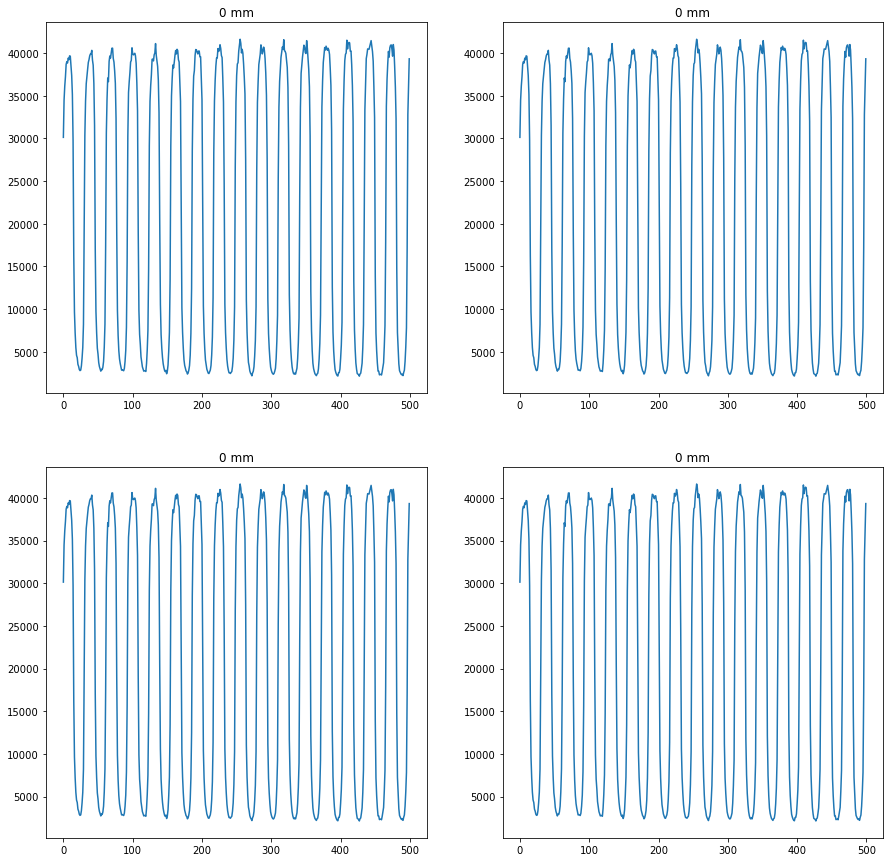

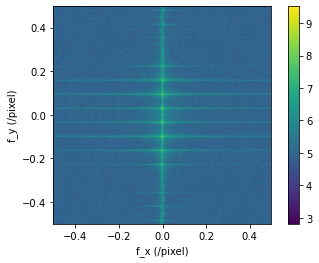

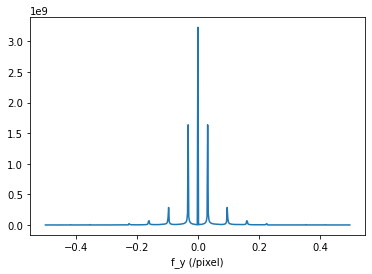

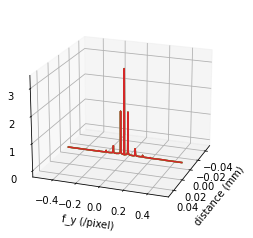

In [87]:
speed_run(onemag, [0,0])

Fitted: 62.448 pixels per line


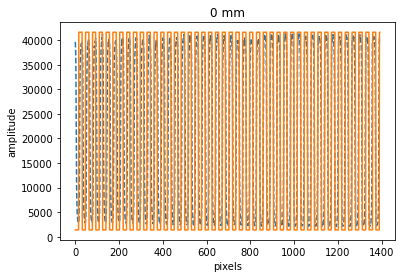

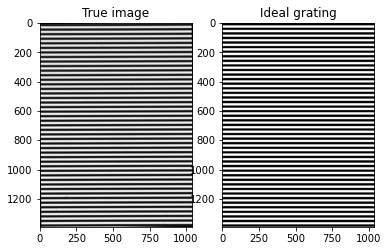

In [88]:
idealsquare, idealgrating = fit_square_to_lineprof(
    im_tilt, 0, [0,0], 62.3, disp=True
)  # fit in-focus

Fitted: 62.448 pixels per line


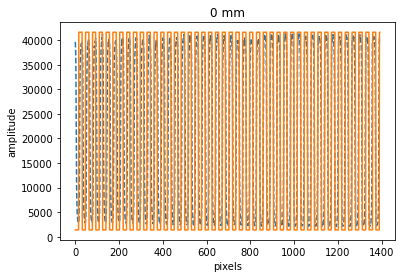

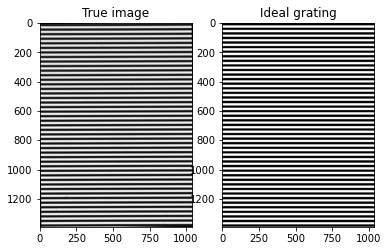

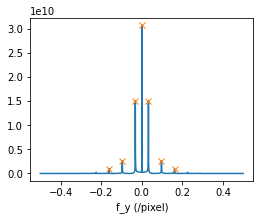

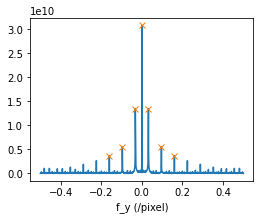

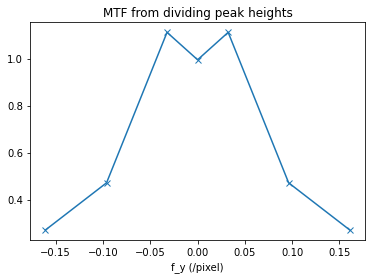

In [100]:
get_mtf_peakdivide(im_tilt, 0, [0, 0], 62.3, thresh_true=0.35e9, thresh_ideal=3e9)